## Circuit creation

In [17]:
L = 12
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 5
particle_pair_length = 1

final_time = 10
layers = 100
measure_every_layers = 1

In [18]:
import z2chain.circs as circs

logical_circs = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, measure_every_layers)

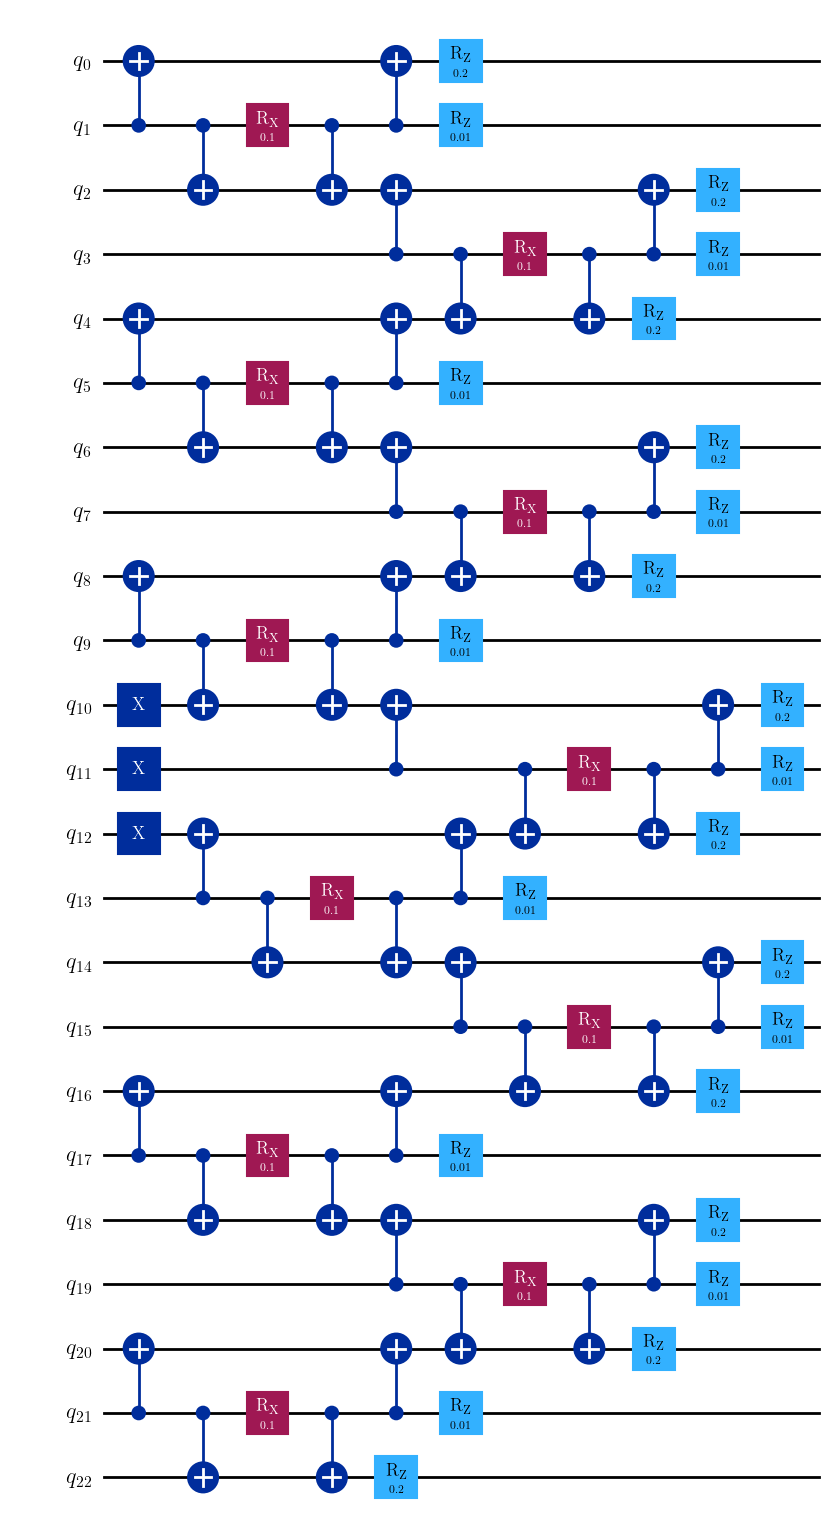

In [19]:
logical_circs[1].draw(output="mpl")

## Ideal statevector circuit simulation

In [20]:
from utils.sexec import execute_simulation_estimator_batch
from z2chain.qiskit_observables import local_pauli_z
from functools import partial

estimator_options = {
    "default_precision": 0
}

simulator_options = {
    "method": "statevector"
}

observables_generating_funcs = [partial(local_pauli_z, qubit_ind=i) for i in range(2*L-1)]

jobs = execute_simulation_estimator_batch(simulator_options, estimator_options, logical_circs, observables_generating_funcs)

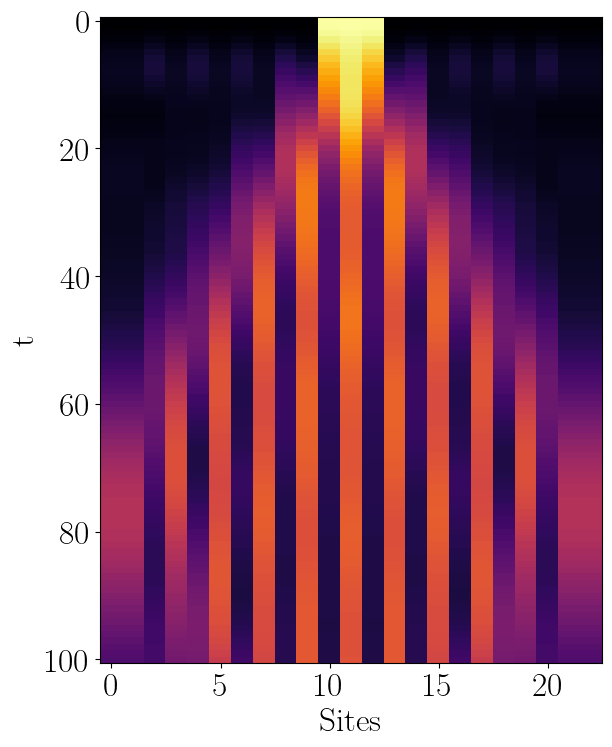

In [21]:
from z2chain.plotting import x_t_plot_jobs

x_t_plot_jobs(jobs)

In [22]:
L = 6
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 2

final_time = 10
steps = 100

results_filepath = f"Results/z2ppairquench_L_{L}_J_{J:.04f}_h_{h:.04f}_lamb_{lamb:.04f}.txt"
overwrite = False

import z2chain.exact as z2ced

trotter_exact_occupation_site_gauge_matrix = z2ced.particle_pair_quench_simulation(L, J, h, lamb, particle_pair_left_position, final_time, steps, results_filepath, overwrite=overwrite)

ValueError: operands could not be broadcast together with shapes (101,11) (101,23) 

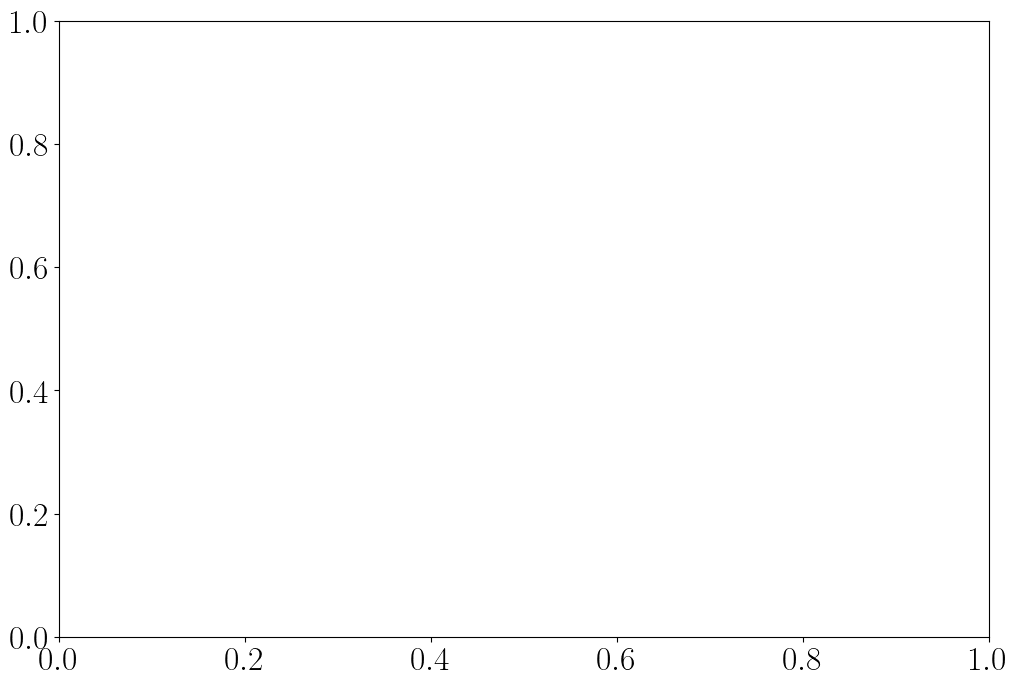

In [23]:
from z2chain.plotting import discrepancies_plot_jobs

discrepancies_plot_jobs(trotter_exact_occupation_site_gauge_matrix, jobs)

Some differences seem to appear in the plot when comparing with the ED-Trotter one but they are minuscule when showing the discrepancies plot